In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


In [3]:
# Define the cryptocurrency ticker
crypto_ticker = "DOGE-USD"  
start_date = "2020-01-01"  
end_date = "2025-01-01"    

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

print(data.head())

data.to_csv("DOGE-USD.csv")
print("Data saved to DOGE-USD.csv")


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker      DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD
Date                                                        
2020-01-01  0.002033  0.002052  0.002021  0.002028  51180941
2020-01-02  0.002009  0.002110  0.001983  0.002034  65071106
2020-01-03  0.002145  0.002177  0.001991  0.002008  62619988
2020-01-04  0.002241  0.002490  0.002050  0.002144  94227582
2020-01-05  0.002419  0.002491  0.002117  0.002240  52631740
Data saved to DOGE-USD.csv


In [4]:

df = pd.read_csv('DOGE-USD.csv')
# df.drop(index=[0,1], inplace=True)
df = df.iloc[2:]


In [5]:
df.head()

,Price,Close,High,Low,Open,Volume
2,2020-01-01,0.00203300011344254,0.0020520000252872705,0.0020210000220686197,0.0020280000753700733,51180941
3,2020-01-02,0.0020089999306946993,0.0021100000012665987,0.0019829999655485153,0.00203399988822639,65071106
4,2020-01-03,0.002145000034943223,0.002177000045776367,0.0019910000264644623,0.002007999923080206,62619988
5,2020-01-04,0.0022410000674426556,0.0024900001008063555,0.002050000010058284,0.0021440000273287296,94227582
6,2020-01-05,0.0024190000258386135,0.002491000108420849,0.0021170000545680523,0.002240000059828162,52631740


In [6]:
df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

In [7]:
df[['Close','Open','Low','High','Volume']] = df[['Close','Open','Low','High','Volume']].astype('float')

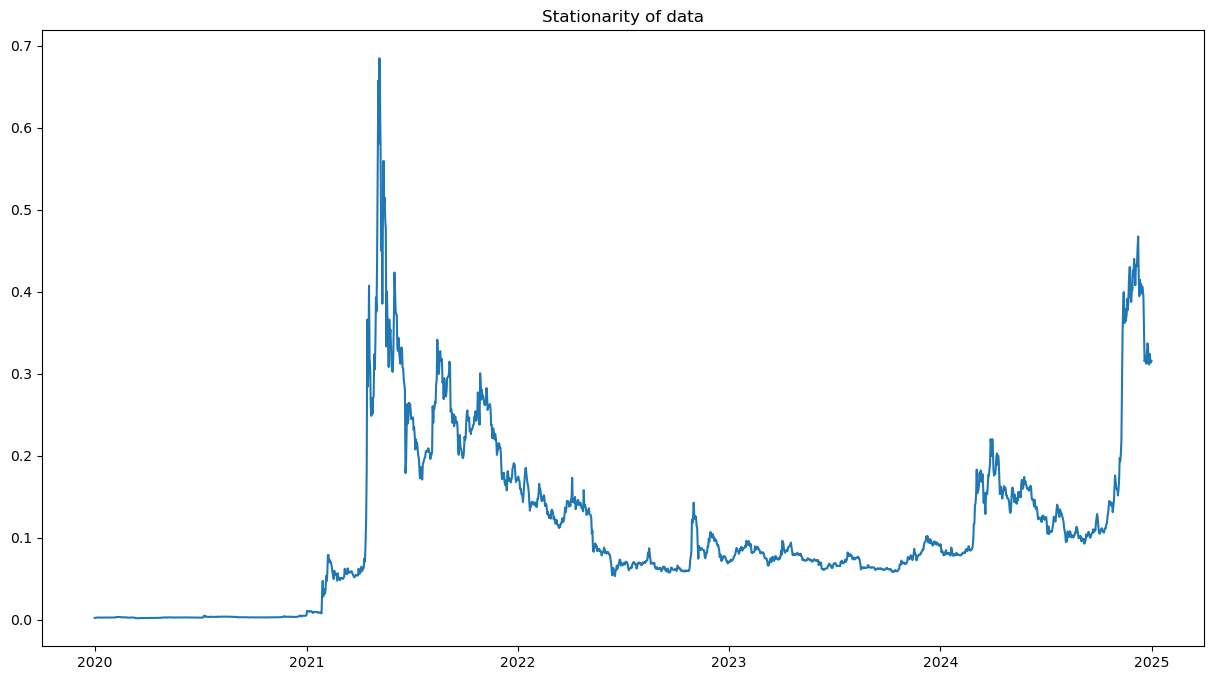

In [8]:
check = pd.DataFrame(df['Close'] )
plt.figure(figsize=(15,8))
plt.title('Stationarity of data')
plt.plot(check)

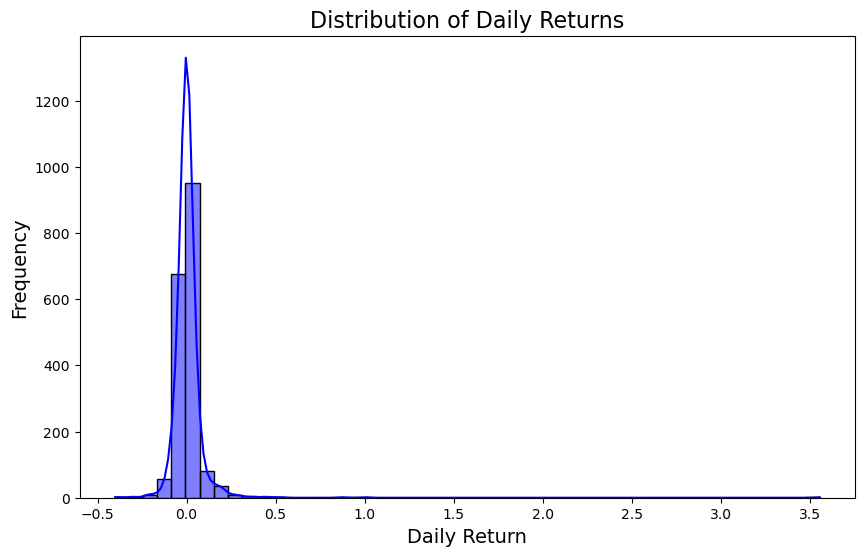

In [9]:
df['Daily Return'] = df['Close'].pct_change() #percentage change 

#analysing daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [10]:
train = df.iloc[:-365]
test = df.iloc[-365:]

In [11]:
# Reverting back to make 'Date' a regular column
train.reset_index(inplace=True)
test.reset_index(inplace=True)

train = train.rename(columns={'Date': 'ds', 'Close': 'y'})
test = test.rename(columns={'Date': 'ds', 'Close': 'y'})

In [12]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

model = Prophet()
model.add_regressor('Volume')
model.add_regressor('Open')